In [28]:
import pandas as pd # ** pandas class를 import함 
df=pd.read_csv('https://bit.ly/perch_csv_data') # ** read_csv로 csv file을 읽고 데이터프레임을 만듦
perch_full=df.to_numpy() # ** 데이터프레임을 to_numpy()로 numpy array로 바꿔줌
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [29]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [30]:
from sklearn.model_selection import train_test_split 

train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

In [31]:
from sklearn.preprocessing import PolynomialFeatures # ** 사이킷런의 전처리를 위한 class  -> 변환기라고 부름

In [32]:
poly=PolynomialFeatures() # ** 객체 생성 위 class의 객체를 생성한 후는 fit->transform 두 과정을 해야함
poly.fit([[2,3]])  # ** 변환기에서 fit은 target 데이터가 필요 없다
print(poly.transform([[2,3]]))  # ** fit으로 훈련을 해야 transform 가능

[[1. 2. 3. 4. 6. 9.]]


In [33]:
poly=PolynomialFeatures(include_bias=False) #** include_bias=False 이건 절편을 위한 항을 제거하기 위함   / 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시함으로 include_bias=False를 꼭 지정하지 않아도 되긴함
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [34]:
poly=PolynomialFeatures(include_bias=False)  # ** 객체를 만들어 준다
poly.fit(train_input)  # ** 위 class에서 fit은 특성 조합을 찾는 목적 -> 그래서 아래에 test_input에서는 다시 특성 조합을 찾을 필요는 없음 
train_poly=poly.transform(train_input)
print(train_poly.shape)

print(train_poly[0:5])


(42, 9)
[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]]


In [35]:
poly.get_feature_names_out() # ** 각 특성이 어떠한 조합으로 만들어졌는지 보여준다

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [36]:
test_poly=poly.transform(test_input) # ** transform test set
print(test_poly[0:5])

[[  8.4      2.11     1.41    70.56    17.724   11.844    4.4521   2.9751
    1.9881]
 [ 18.       5.22     3.32   324.      93.96    59.76    27.2484  17.3304
   11.0224]
 [ 27.5      7.28     4.57   756.25   200.2    125.675   52.9984  33.2696
   20.8849]
 [ 21.3      6.38     3.53   453.69   135.894   75.189   40.7044  22.5214
   12.4609]
 [ 22.5      5.86     3.62   506.25   131.85    81.45    34.3396  21.2132
   13.1044]]


In [37]:
from sklearn.linear_model import LinearRegression # ** 선형 회귀를 위한 import
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target)) # ** 모델 평가

0.9903183436982125


In [38]:
print(lr.score(test_poly,test_target))
# ** 결과를 보면 이전의 모델에서의 과소적합이 해결됐음을 확인할 수 있음 -> 다중 회귀 모델은 특성이 복잡함으로 과소적합문제를 해결

0.9714559911594155


In [39]:
poly=PolynomialFeatures(degree=5, include_bias=False)  # ** PolynomialFeatures class는 degree 매개변수를 사용해서 고차항의 최대 차수 지정 가능 -> 여기선 5차
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape) # ** 최고차항을 5(degree=5) 일 때  특성의 갯수는 55개

print(train_poly[0:1])
print(test_poly[0:1])

(42, 55)
[[1.96000000e+01 5.14000000e+00 3.04000000e+00 3.84160000e+02
  1.00744000e+02 5.95840000e+01 2.64196000e+01 1.56256000e+01
  9.24160000e+00 7.52953600e+03 1.97458240e+03 1.16784640e+03
  5.17824160e+02 3.06261760e+02 1.81135360e+02 1.35796744e+02
  8.03155840e+01 4.75018240e+01 2.80944640e+01 1.47578906e+05
  3.87018150e+04 2.28897894e+04 1.01493535e+04 6.00273050e+03
  3.55025306e+03 2.66161618e+03 1.57418545e+03 9.31035750e+02
  5.50651494e+02 6.97995264e+02 4.12822102e+02 2.44159375e+02
  1.44405545e+02 8.54071706e+01 2.89254655e+06 7.58555575e+05
  4.48639873e+05 1.98927329e+05 1.17653518e+05 6.95849599e+04
  5.21676772e+04 3.08540347e+04 1.82483007e+04 1.07927693e+04
  1.36807072e+04 8.09131319e+03 4.78552376e+03 2.83034868e+03
  1.67398054e+03 3.58769566e+03 2.12190560e+03 1.25497919e+03
  7.42244501e+02 4.38992857e+02 2.59637799e+02]]
[[8.40000000e+00 2.11000000e+00 1.41000000e+00 7.05600000e+01
  1.77240000e+01 1.18440000e+01 4.45210000e+00 2.97510000e+00
  1.98810000

In [40]:
lr.fit(train_poly,train_target)  # ** model training
print(lr.score(train_poly,train_target))  # ** 성능 평가

0.9999999999938143


In [41]:
print(lr.score(test_poly,test_target))  # ** 특성 수가 너무 많음 -> 모델이 너무 복잡함 -> 이러한 경우 훈련 세트에 모델이 너무 과대적합 됨-> test_case에서 좋지 않은 성능을 보임

-144.40744532797535


In [42]:
from sklearn.preprocessing import StandardScaler # ** 사이킷런의 정규화를 위한 변환기를 import
ss=StandardScaler() # ** 객체 생성
ss.fit(train_poly) # ** 변환할 특성을 정하기 위한 fit
train_scaled=ss.transform(train_poly) # ** 변환
test_scaled=ss.transform(test_poly) # ** 핵심은 train set로 학습한 변환기를 사용해 test set도 변환해야 한다는거

In [43]:
from sklearn.linear_model import Ridge # ** 릿지(ridge)와 라쏘(lasso)가 포함된 패키지를 import 한다
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))

0.9896101671037343


In [44]:
print(ridge.score(test_scaled,test_target))

0.979069397761539


In [45]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

In [46]:
alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
    ridge=Ridge(alpha=alpha) # ** 릿지 모델을 만듦, alpha 값은 위에 리스트에 저장되어 둠
    ridge.fit(train_scaled,train_target) # ** 훈련
    train_score.append(ridge.score(train_scaled,train_target)) # ** 훈련 데이터의 점수와 테스트 데이터의 점수를 위의 리스트에 저장한다
    test_score.append(ridge.score(test_scaled,test_target))

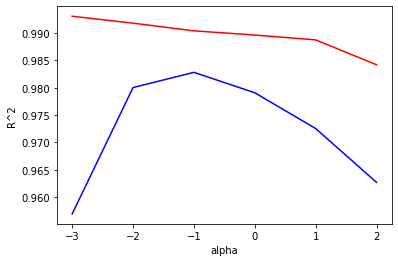

In [47]:
plt.plot(np.log10(alpha_list),train_score,'r') #** 넘파이 로그 함수 -> 위 함수를 사용하는 이유는 0.001, 0.01, 0.1 1 이렇게 해버리면 x좌표가 너무 촘촘하게 나오니까 np.log()-> 자연상수 e가 밑, np.log10()-> 10이 밑
plt.plot(np.log10(alpha_list),test_score,'b')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() #** 그래프를 보면 R^2값의 차이가 가장 작은 부분인 alpha가 적절한 alpha 이므로 alpha=0.1로 설정

In [48]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target)) #** 평가 값을 비교해 보면 해당 모델은 과대적합과 과소적합 사이에서 균형을 이루고 있음을 볼 수 있음

0.9903815817570368
0.9827976465386954


In [49]:
from sklearn.linear_model import Lasso #** Lasso class를 import
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))

0.989789897208096


In [50]:
print(lasso.score(test_scaled,test_target))
#** 점수를 보면 lasso도 과대적합을 해결했음을 확인 가능

0.9800593698421884


In [51]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100]

for alpha in alpha_list:
    lasso=Lasso(alpha=alpha,max_iter=10000) #** alpha 값을 지정하면 규제 강도 조정 가능, 매개변수 max_iter를 지정하는 이유는 lasso model은 최적의 계수를 찾기 위해 반복적인 계산을 진행하는데 지정한 반복 횟수가 부족하면 에러가 생길 수 있어서
    lasso.fit(train_scaled,train_target)
    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))
    

c:\Users\Sejong\anaconda3\envs\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Sejong\anaconda3\envs\conda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


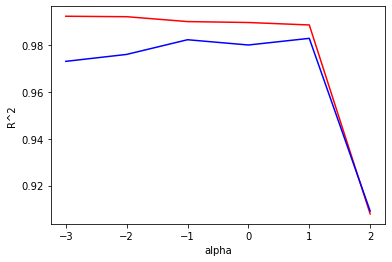

In [52]:
plt.plot(np.log10(alpha_list),train_score,'r')
plt.plot(np.log10(alpha_list),test_score,'b')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [53]:
lasso=Lasso(alpha=10)
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))
#** 결과값을 보면 lasso model이 과대적합을 잘 억제함을 확인 가능

0.9888067471131867
0.9824470598706695


In [54]:
print(np.sum(lasso.coef_==0)) #** lasso model은 계수 값을 0으로도 놓을 수 있음  /  np.sum은 비교연산자에 맞는 값(True=1,False=0)을 모두 더헤 반환함

40
